In [1]:
from symred.symplectic import PauliwordOp
from symred.symplectic import random_anitcomm_2n_1_PauliwordOp, random_PauliwordOp
from symred.unitary_partitioning import AntiCommutingOp, apply_LCU_to_operator_only_necessary_ops
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import numpy as np
import scipy as sp

In [2]:
### AC set is size 2n_qubits+1

# n_qubits = 8
# n_terms_H = 100

# n_qubits = 15
# n_terms_H = 5

# n_qubits = 6
# n_terms_H = 3_00

n_qubits = 16
n_terms_H = 6

In [3]:
np.random.randint(0,2,(4, 2*4)) 

array([[1, 1, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 1, 0, 1, 1, 1],
       [0, 0, 0, 0, 1, 0, 0, 1],
       [0, 1, 0, 0, 0, 1, 1, 0]])

In [4]:
complex_coeff = False
apply_clifford = True

random_anti_op = random_anitcomm_2n_1_PauliwordOp(n_qubits,
                                                  complex_coeff=complex_coeff, 
                                                  apply_clifford=apply_clifford)

In [5]:
H_rand = random_PauliwordOp(n_qubits, n_terms_H, diagonal=False, complex_coeffs=complex_coeff)

In [6]:
size_A = 2*n_qubits+1

LCU_hamilts=[]
SeqRot_hamilts=[]

all_rows = np.arange(size_A)
for clique_size in tqdm(range(2,size_A)):
    
    np.random.shuffle(all_rows) # shuffle rows
    rows = all_rows[:clique_size] # take only certain number
    UP = AntiCommutingOp(random_anti_op.symp_matrix[rows, :],
                         random_anti_op.coeff_vec[rows])
    
    
    ## Sequence of rotations
    R_seq_rot, P_seq = UP.gen_seq_rotations(check_reduction=False)
    SeqRot_H = H_rand.copy()
    for X_sk, theta_sk in R_seq_rot:
        SeqRot_H = SeqRot_H._rotate_by_single_Pword(X_sk, theta_sk)
            
    SeqRot_hamilts.append(SeqRot_H)
    
    ## LCU method
    R_LCU, P_lcu = UP.gen_LCU(check_reduction=False)
    LCU_H = apply_LCU_to_operator_only_necessary_ops(H_rand, R_LCU)
    LCU_hamilts.append(LCU_H)

  0%|          | 0/31 [00:00<?, ?it/s]

In [7]:
# t1 = anticom_self.multiply_by_constant(np.cos(angle))

# t1.symp_matrix.shape

In [8]:
LCU_sizes = [h.n_terms for h in LCU_hamilts]
SeqRot_sizes = [h.n_terms for h in SeqRot_hamilts]

In [9]:
def SeqRotScaling(size_A, size_H):
    size_R = size_A-1
#     return size_H*(size_R**2/2 + size_R/2)
#     return size_H/2*size_R*(size_R+1)
#     return size_H/2*size_R**2*(size_R+1)
#     return size_H/4 *size_R**2 * (size_R**2 - 1)
#     return size_H/12 * (size_R**4 - size_R**2)
#     return size_H * ( (size_R**4)/12 + (size_R**3)/3 + (5*size_R**2)/12 + (size_R)/6 )
#     return size_H * ( (size_R**3)/2 + (size_R**2)/2 + size_R )


#     test_terms= sum([size_R**R_si/(3*R_si**R_si) for R_si in range(1, size_R)])
#     return size_H * ( test_terms ) + size_H+2

#     test_terms= sum([R_si*size_H for R_si in range(1, size_R)])
#     return ( test_terms + size_H)

#     terms = size_R * (size_R+1)
#     terms = size_R/2 * (size_R+3)
#     terms = (size_R**2)/2 + (3*size_R)/2 +1

#     terms = (size_R**3)/2 + (size_R**2)/2
#     return ( size_H*terms)
#     terms = (size_R**3)//6 + (size_R**2)//2 + (size_R)//3
#     terms = (size_R**4)/3 + (size_R**3)/2 + (size_R**2)/6
#     terms = (size_R**3)/2 + (size_R**2)/2
#     terms = (2**size_R)
#     terms = 2**(size_R)
#     return size_H*terms
#     terms= sum([size_R**R_si/(3*R_si**R_si) for R_si in range(1, size_R)])
#     return ( size_H + size_H*terms)
#     return ( size_H*np.e**size_R)

#     return size_H * ( (size_R**4)/6 + (size_R**3)/2 + (size_R**2)/3 )
#     return size_H/24 * (size_R-1) * size_R * (size_R+1) * (5*size_R+2)

#     return (2**(size_R))*size_H
#     return (2**(size_R))*size_H - (2**(size_R)) + 1
#     test_terms= sum([size_R**R_si/(3*R_si**R_si) for R_si in range(1, size_R)])
#     return size_H**3/2 + size_H**2/2
    
#     poly = 2**(size_R-1) * 1/(size_R**2)
#     return size_H*poly
    poly = sum([ sp.special.comb(size_R, R_si)/2**(R_si) for R_si in range(0, size_R)])
    return size_H*(poly)


SeqRot_scaling = [SeqRotScaling(A , H_rand.n_terms) for A in range(2,size_A)]
SeqRot_scaling

[6.0,
 12.0,
 19.5,
 30.0,
 45.375,
 68.25,
 102.46875,
 153.75,
 230.6484375,
 345.984375,
 518.982421875,
 778.4765625,
 1167.71630859375,
 1751.5751953125,
 2627.3631591796875,
 3941.044921875,
 5911.567474365234,
 8867.351257324219,
 13301.026908874512,
 19951.54037475586,
 29927.310567855835,
 44890.965854644775,
 67336.44878339767,
 101004.67317581177,
 151507.00976407528,
 227260.51464629173,
 340890.771969527,
 511336.1579543352,
 767004.2369315252,
 1150506.355397299,
 1725759.533095954]

In [10]:
# SeqRot_sizes

original H size: 6
n_qubits: 16


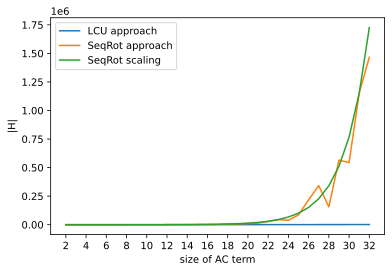

In [11]:
%matplotlib inline

print(f'original H size: {H_rand.n_terms}')
print(f'n_qubits: {H_rand.n_qubits}')


AC_set_sizes = list(range(2,size_A))

plt.plot(AC_set_sizes, LCU_sizes, label='LCU approach')
plt.plot(AC_set_sizes, SeqRot_sizes, label='SeqRot approach')

plt.plot(AC_set_sizes, SeqRot_scaling, label='SeqRot scaling')

plt.ylabel('|H|')
plt.xlabel('size of AC term')
plt.xticks(list(range(2, size_A, 2)))

plt.legend()
plt.show()

original H size: 6
n_qubits: 16


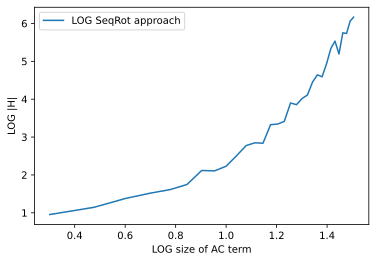

In [12]:
%matplotlib inline

log_y_SeqRot = np.log10(SeqRot_sizes)
log_x_SeqRot = np.log10(AC_set_sizes)

print(f'original H size: {H_rand.n_terms}')
print(f'n_qubits: {H_rand.n_qubits}')


plt.plot(log_x_SeqRot, log_y_SeqRot, label='LOG SeqRot approach')


plt.ylabel('LOG |H|')
plt.xlabel('LOG size of AC term')
# plt.xticks(list(range(2, size_A, 2)))

plt.legend()
plt.show()

In [13]:
# LCU_sizes

In [14]:
# SeqRot_sizes

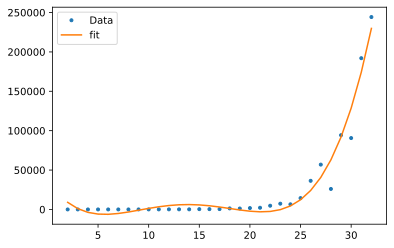

array([     2.96213178,   -160.86309161,   2918.32042123, -19732.33272154,
        38054.64166212])

In [15]:
import scipy.optimize as opt;

# This is the function we are trying to fit to the data.
# def func(x, a, b, c):
#      return a * np.exp(b*x) + c

def func(x, a, b, c, d, e):
     return a*x**4 + b*x**3 + c*x**2 + d*x + e

# def func(x, a, b, c, d):
#      return a*x**4 + b*x**3 + c*x**2 + d

xdata = np.array(AC_set_sizes)
ydata = np.array(SeqRot_sizes)/H_rand.n_terms

# Plot the actual data
plt.plot(xdata, ydata, ".", label="Data");

# The actual curve fitting happens here
optimizedParameters, pcov = opt.curve_fit(func, xdata, ydata);

# Use the optimized parameters to plot the best fit
plt.plot(xdata, func(xdata, *optimizedParameters), label="fit");

# Show the graph
plt.legend();
plt.show();

optimizedParameters

In [16]:
ydata

array([     1.5       ,      2.33333333,      4.        ,      5.5       ,
            6.83333333,      9.33333333,     21.83333333,     21.33333333,
           28.33333333,     53.66666667,     99.16666667,    117.5       ,
          114.66666667,    354.        ,    367.16666667,    432.        ,
         1322.66666667,   1194.16666667,   1739.5       ,   2152.16666667,
         4727.        ,   7310.5       ,   6503.5       ,  14380.        ,
        36343.83333333,  56923.66666667,  26019.83333333,  94272.5       ,
        90624.5       , 192010.16666667, 244251.66666667])

In [17]:
# from symred.utils import get_ground_state_sparse

# [get_ground_state_sparse(h.to_sparse_matrix)[0] for h in SeqRot_hamilts[:8] (if h.n_qubits<14 and h.n_terms<300)]